## Imports

In [121]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
# sns.set(font_scale=1.5)

from sklearn.preprocessing import StandardScaler,\
                                  LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('Data/cleaned_real_estate_data.csv')

## Preliminary exploration

In [3]:
df.shape

(195, 13)

In [4]:
df.columns

Index(['sub_area', 'n_bhk', 'property_area_SqFt', 'price', 'company_name',
       'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
       'gym'],
      dtype='object')

In [5]:
df.select_dtypes(include='object').head()

,sub_area,company_name,township,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [12]:
df.township.unique()

array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
       'vtp cierra', 'vtp blue water', 'om mangalam chaitanya',
       'sukwani aspire', 'mantra 29 gold', 'mantra monarch', 'infinity',
       'mantra insignia', '7hills', 'mantra sky tower', 'newton homes',
       'lesiure town', 'k ville', 'bluegrass residences',
       'brookefield willows', 'tranquility annexe', 'mahalunge riviera',
       'simplicity', 'aureta', 'unique legacy royale', 'presidia',
       'eternia 2.0', 'bliss solitaire', 'impero', 'river dale residency',
       'neco beaumont', 'anutham', 'sensorium', 'kiarah terrazo',
       'dolphin garima', 'oxy beaumonde', 'sportsville', 'presidenta',
       'bhaktamar residency', 'parklane urbanjoy', 'khush vista',
       'oxy eterno', 'abitante fiore', 'puraniks sayama', 'rhythm county',
       'kalpataru serenity', 'satyam shivam', 'satyam serenity',
       'jade residences', 'satyam shery', 'atulya kanhe', 'supreme estia',
       'tej elevia', 'vtp 

In [10]:
df.company_name.unique()

array(['shapoorji paloonji', 'godrej properties', 'anp corp',
       'urban space creator', 'vtp reality', 'waghvani constructions',
       'sukwani associates', 'mantra properties', 'ravima ventures',
       'proviso group', 'unique properties', 'sagitarius ecospaces llp',
       'nirman developers', 'jhala group', 'shroff developers',
       'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
       'maha anand pinnac associates', 'vasupujya corporation',
       'ace constructions', 'wellwisher apartments', 'dolphin group',
       'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
       'porwal & anand develkoper', 'porwal  develkoper',
       'keystone landmark', 'puraniks', 'majestique landmarks',
       'kalpataru', 'vijaya laxmi creations',
       'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
       'tejraaj group'], dtype=object)

In [76]:
# drop the columns: ["company_name", "township"]
# as they have too many variables
df1 = df.drop(columns=["company_name", "township"]).drop_duplicates()

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sub_area            195 non-null    object 
 1   n_bhk               195 non-null    float64
 2   property_area_SqFt  195 non-null    float64
 3   price               195 non-null    float64
 4   club_house          195 non-null    object 
 5   school              195 non-null    object 
 6   hospital            195 non-null    object 
 7   mall                195 non-null    object 
 8   park                195 non-null    object 
 9   pool                195 non-null    object 
 10  gym                 195 non-null    object 
dtypes: float64(3), object(8)
memory usage: 18.3+ KB


In [78]:
df1.head()

,sub_area,n_bhk,property_area_SqFt,price,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1.0,492.0,3.9,yes,yes,yes,yes,yes,yes,yes
1,bavdhan,2.0,774.0,6.5,yes,yes,yes,yes,yes,yes,yes
2,bavdhan,3.0,889.0,7.4,yes,yes,yes,yes,yes,yes,yes
3,bavdhan,3.0,1018.0,8.9,yes,yes,yes,yes,yes,yes,yes
4,mahalunge,2.0,743.0,7.4,yes,yes,yes,yes,yes,yes,yes


In [79]:
df1.columns

Index(['sub_area', 'n_bhk', 'property_area_SqFt', 'price', 'club_house',
       'school', 'hospital', 'mall', 'park', 'pool', 'gym'],
      dtype='object')

## Converting binary columns to dummy variables

In [80]:
# Selecting the binary columns

binary_cols = df1.iloc[:, 4:].columns.to_list()
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [81]:
# average price for apartments with and without swimming pool
df1[["price", "pool"]].groupby("pool")["price"].mean()

pool
no     6.456944
yes    9.965366
Name: price, dtype: float64

In [82]:
# pd.get_dummies(df1, columns=['club_house','school','hospital',\
#                              'mall', 'park', 'pool', 'gym'],
#                drop_first=True)

In [83]:
le = LabelEncoder()

for col in binary_cols:
    df1[col] = le.fit_transform(df1[col])

In [84]:
df1.tail(10)

# 0->no, 1->yes

,sub_area,n_bhk,property_area_SqFt,price,club_house,school,hospital,mall,park,pool,gym
185,bavdhan,2.0,665.0,6.499,1,0,0,0,1,0,0
186,talegoan,1.0,280.0,1.319,1,0,0,0,1,1,1
187,talegoan,2.0,385.0,1.729,1,0,0,0,1,0,1
188,baner,2.0,730.0,8.700,1,0,0,0,1,1,1
189,baner,3.0,1135.0,12.900,1,0,0,0,1,1,1
190,baner,3.0,1350.0,16.000,1,0,0,0,1,1,1
191,baner,4.0,1600.0,23.000,1,0,0,0,1,1,1
192,baner,2.0,789.0,9.500,0,0,0,0,1,1,1
193,baner,3.0,1107.0,13.500,0,0,0,0,1,1,1
194,baner,2.0,776.0,9.068,1,0,0,0,1,1,1


### 'sub_area' Contribution

In [85]:
# Contribution of different sub-areas on the dataset 

df_sa_count = df1.sub_area.value_counts()\
                 .reset_index()\
                 .rename(columns={"sub_area":"count","index":'sub_area'})

df_sa_count.head(10)

,sub_area,count
0,kharadi,16
1,ravet,12
2,baner,12
3,handewadi,11
4,bt kawade rd,10
5,bavdhan,10
6,mahalunge,9
7,hinjewadi,9
8,wadgaon sheri,9
9,hadapsar,8


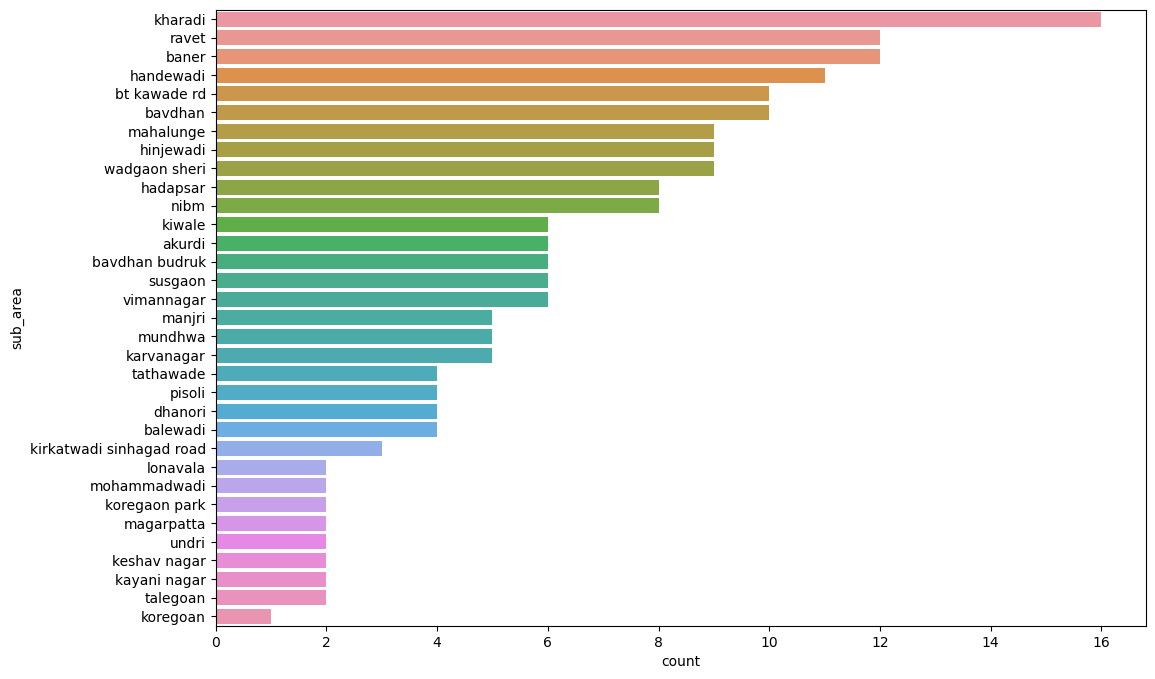

In [86]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x="count", y="sub_area", ax=ax)
plt.show();

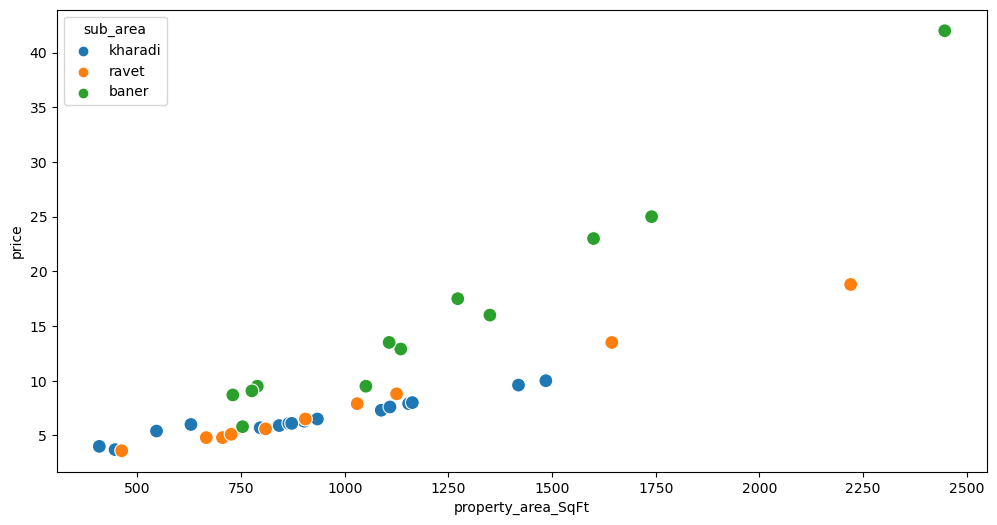

In [87]:
# Price vs property_area_SqFt for the first three most contribuions
fig, ax = plt.subplots(figsize=(12, 6))
df_plot = df_sa_count.merge( df1[["sub_area", "property_area_SqFt", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>11]

sns.scatterplot(data=df_plot, x="property_area_SqFt", y="price",
                hue="sub_area", s=100)
plt.show();

['kharadi','ravet'] have similar prices but 'baner' sub_area seems to be much more expensive

## Feature engineering

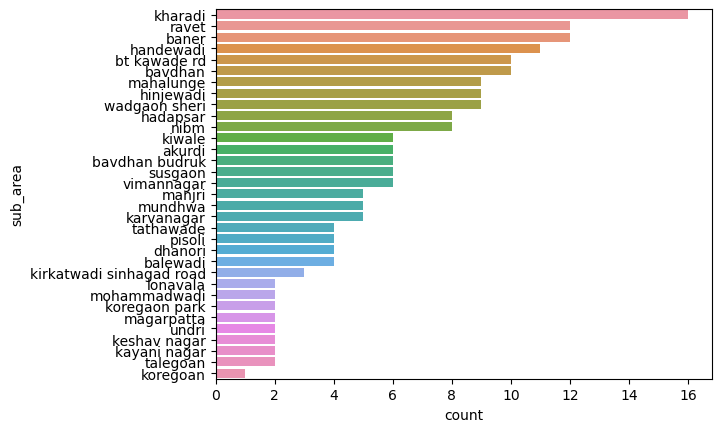

In [88]:
sns.barplot(data=df_sa_count, x="count", y="sub_area")
plt.show();

In [89]:
len(df_sa_count), np.mean(df_sa_count["count"])

# In avg. we have 6 counts per sub_area and since we have very low
# num. of data points, 
# Above we can see, low num. of points per sub_area can lead to over-fitting

(33, 5.909090909090909)

In [90]:
# So, here we are keeping all the sub_areas with count>7 as it is,
# and renaming other sub_areas as 'other' with count<6 

df2 = df1.copy()

sa_sel_col = df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()

df2["sub_area"] = df2["sub_area"].where(df2["sub_area"].isin(sa_sel_col),
                                        "other")

In [91]:
df2.sub_area.value_counts()

other            81
kharadi          16
ravet            12
baner            12
handewadi        11
bavdhan          10
bt kawade rd     10
mahalunge         9
hinjewadi         9
wadgaon sheri     9
hadapsar          8
nibm              8
Name: sub_area, dtype: int64

### Converting Sub-Area to dummy variables

In [108]:
# Dummy variable conversion

hoten = OneHotEncoder(sparse=False)

X_dummy = hoten.fit_transform(df2[["sub_area"]])

X_dummy.shape, X_dummy, X_dummy.dtype

((195, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [109]:
X_dummy = X_dummy.astype("int64")

In [110]:
# Adding the dummy columns to the dataset

sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df2.loc[:,sa_cols_name] = X_dummy
df2.head()

,sub_area,n_bhk,property_area_SqFt,price,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [112]:
# Sub_area and dummy columns relationship 

df2[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


## Univariate & Bivariate Analysis

In [113]:
data = df2.select_dtypes(exclude='object')
data.head()

,n_bhk,property_area_SqFt,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,1.0,492.0,3.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [115]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
n_bhk,195.0,2.379487,0.846210,1.000,2.0,2.0,3.0,6.0
property_area_SqFt,195.0,897.323077,372.841718,280.000,670.0,796.0,1044.5,2447.0
price,195.0,8.669949,5.808464,1.319,5.1,7.0,9.7,46.0
club_house,195.0,0.743590,0.437775,0.000,0.0,1.0,1.0,1.0
school,195.0,0.030769,0.173136,0.000,0.0,0.0,0.0,1.0
hospital,195.0,0.030769,0.173136,0.000,0.0,0.0,0.0,1.0
mall,195.0,0.030769,0.173136,0.000,0.0,0.0,0.0,1.0
park,195.0,0.979487,0.142111,0.000,1.0,1.0,1.0,1.0
pool,195.0,0.630769,0.483839,0.000,0.0,1.0,1.0,1.0
gym,195.0,0.805128,0.397122,0.000,1.0,1.0,1.0,1.0


### Continuous Variable

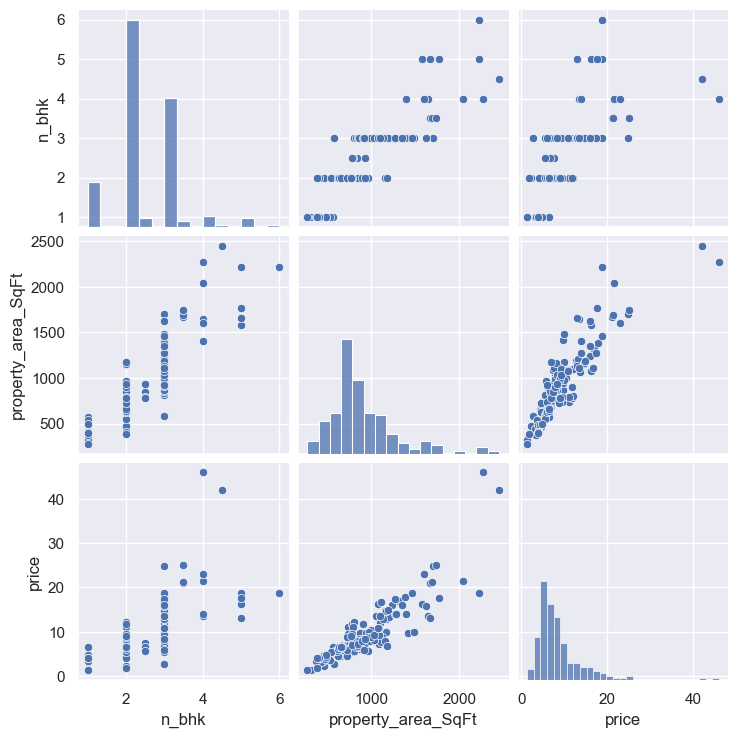

In [120]:
float_cols = data.select_dtypes( include="float" ).columns.to_list()
sns.pairplot(data[float_cols])
plt.show();

### Binary Variables

In [123]:
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

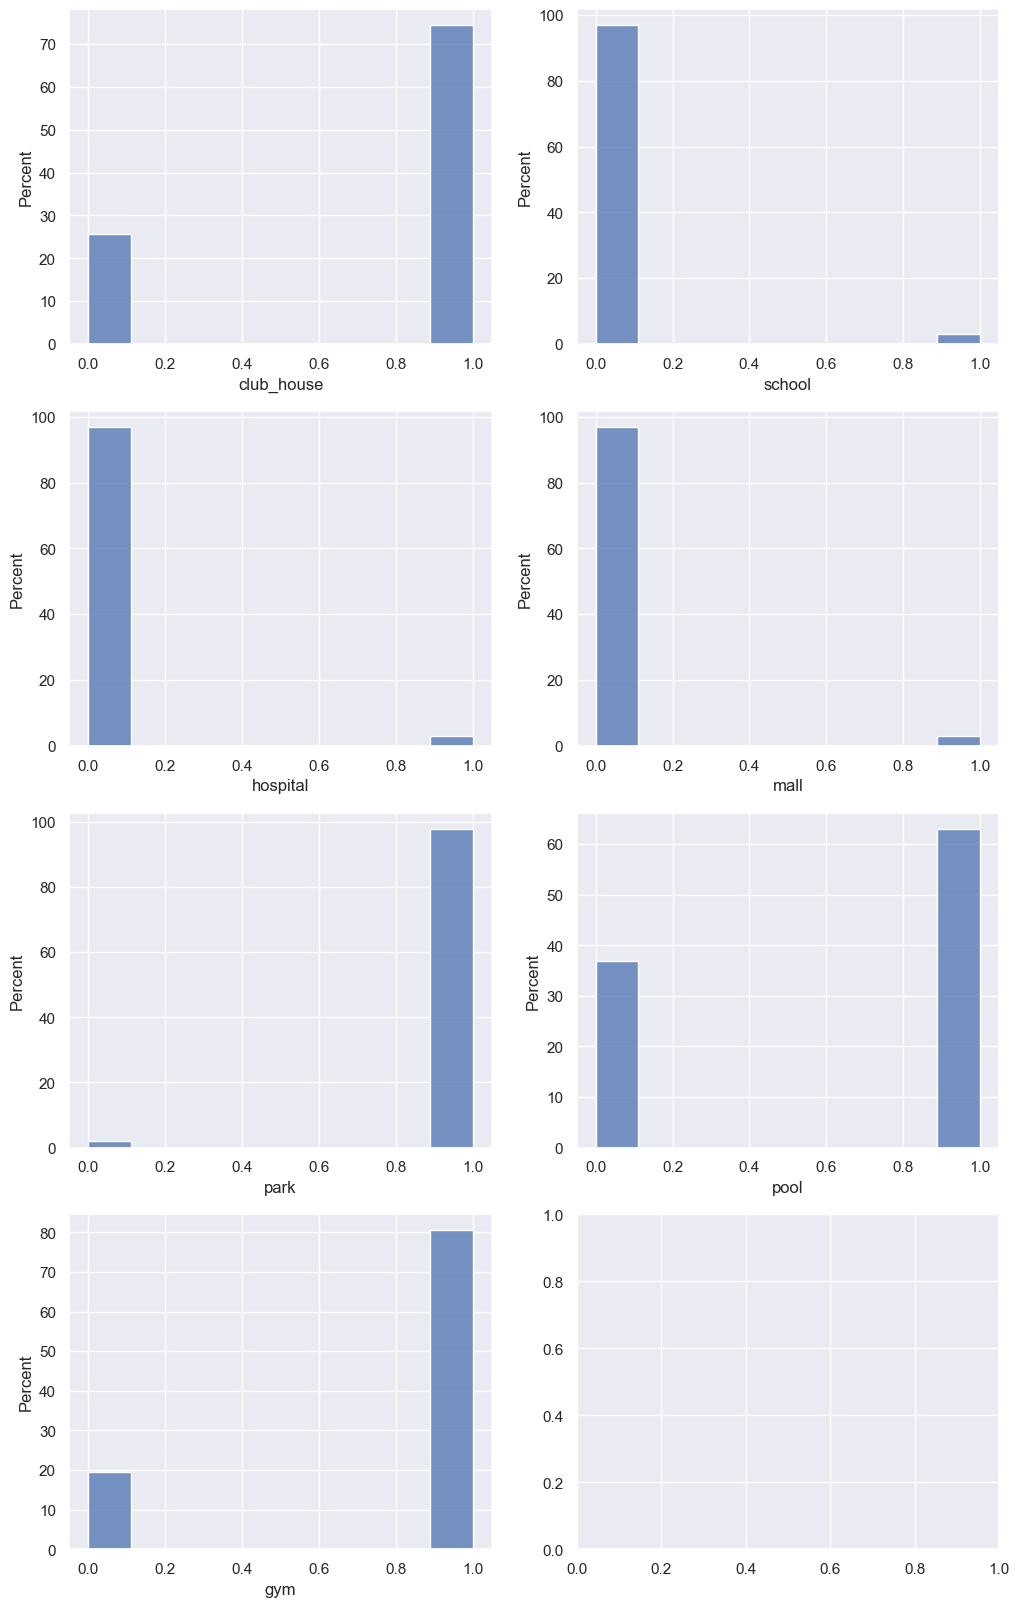

In [122]:
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="percent")

['school', 'hospital', 'mall'] does not do much contribution in price determination as most township areas do not have these.

### Correlation map

In [136]:
# corr_cols_list = float_cols+binary_cols
# correl = data[corr_cols_list].corr()
# correl

In [137]:
# np.zeros_like(correl, dtype=np.bool_) 

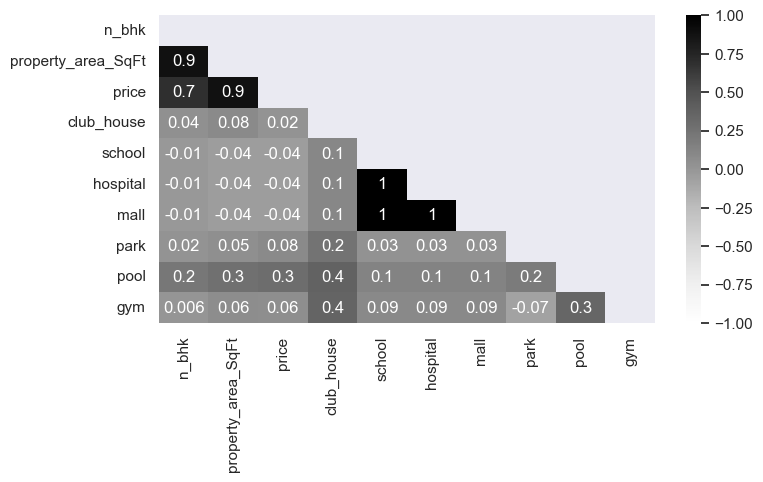

In [141]:
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl, dtype=np.bool_) 

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show();

Selecting those features that have high correlation with price

## Feature selection

In [148]:
corr_cols_list

['n_bhk',
 'property_area_SqFt',
 'price',
 'club_house',
 'school',
 'hospital',
 'mall',
 'park',
 'pool',
 'gym']

In [149]:
# Price correlation with all other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(data["price"].corr(data[col]),2) )    

corr_list

[0.7,
 0.88,
 0.02,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.29,
 0.06,
 0.33,
 -0.11,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.03,
 -0.0,
 -0.07]

In [160]:
# Sorted correlations
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr_with_price"] )\
            .sort_values("corr_with_price", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr_with_price
0,property_area_SqFt,0.88
1,n_bhk,0.70
2,sa1,0.33
3,pool,0.29
4,sa9,0.23
5,sa3,0.08
6,park,0.08
7,gym,0.06
8,club_house,0.02
9,sa11,-0.00


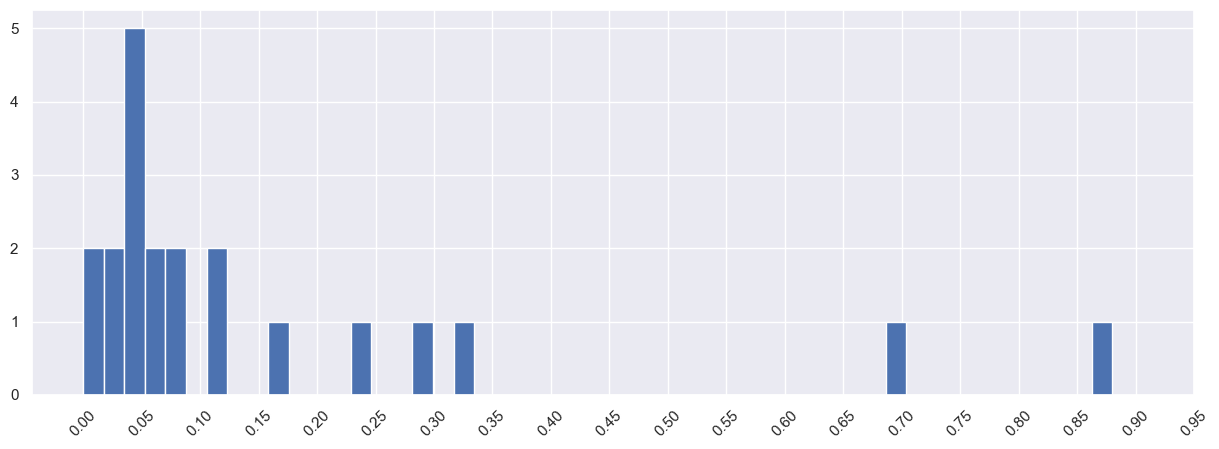

In [161]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr_with_price"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show();

In [162]:
# features having corr. with price > 0.1

features = df_corr.loc[abs(df_corr["corr_with_price"])>.1, "col_name"].to_list() 
features, len(features)

(['property_area_SqFt', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [164]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df2[col]==1
    sa = df2.loc[sa_triger, "sub_area"].to_list()[0]
    x = df2.loc[sa_triger, "price"]
    lst.append( (sa, np.mean(x), df2[col].sum()) )

print(("sub_area_name", 'avg_price', 'num_of_apartments'))
lst

('sub_area_name', 'avg_price', 'num_of_apartments')


[('baner', 16.039, 12),
 ('nibm', 15.100000000000001, 8),
 ('kharadi', 6.631062499999999, 16),
 ('bavdhan', 5.8044, 10),
 ('handewadi', 4.568818181818181, 11)]

In [165]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area","mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

,sub_area,mean_price,count,total_mean_price
0,baner,16.039000,12,8.669949
1,nibm,15.100000,8,8.669949
2,kharadi,6.631062,16,8.669949
3,bavdhan,5.804400,10,8.669949
4,handewadi,4.568818,11,8.669949


### Data Scaling

In [166]:
# Selection the final dataset, features having corr. with price > 0.1
sel_data = data[features+["price"]].copy()
sel_data.head()

,property_area_SqFt,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,492.0,1.0,0,1,0,0,1,0,3.9
1,774.0,2.0,0,1,0,0,1,0,6.5
2,889.0,3.0,0,1,0,0,1,0,7.4
3,1018.0,3.0,0,1,0,0,1,0,8.9
4,743.0,2.0,0,1,0,0,0,0,7.4


In [169]:
sc = StandardScaler(with_mean=True, with_std=True)

sel_data['property_area_SqFt'] = sc.fit_transform(sel_data[['property_area_SqFt']])

In [170]:
sel_data

,property_area_SqFt,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.089917,1.0,0,1,0,0,1,0,3.900
1,-0.331617,2.0,0,1,0,0,1,0,6.500
2,-0.022381,3.0,0,1,0,0,1,0,7.400
3,0.324501,3.0,0,1,0,0,1,0,8.900
4,-0.414976,2.0,0,1,0,0,0,0,7.400
...,...,...,...,...,...,...,...,...,...
190,1.217251,3.0,1,1,0,0,0,0,16.000
191,1.889503,4.0,1,1,0,0,0,0,23.000
192,-0.291282,2.0,1,1,0,0,0,0,9.500
193,0.563823,3.0,1,1,0,0,0,0,13.500


### Saving the final data

In [172]:
# save the new data
sel_data.to_csv("Data/processed_real_estate_data.csv", index=False)